In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
%matplotlib inline

In [2]:
plt.style.use(['dark_background', 'seaborn-talk'])

In [3]:
links = pd.read_csv('email-links-all.csv')

In [4]:
links.shape

(614586, 3)

In [5]:
links = links[links.Date > '1980-01-01 00:00:00'][links.Date < '2043-12-28 19:34:12']

/home/volodymyrmiz/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [6]:
links.head()

,Date,From,To
0,2001-05-14 23:39:00,phillip.allen@enron.com,tim.belden@enron.com
1,2001-05-04 20:51:00,phillip.allen@enron.com,john.lavorato@enron.com
2,2000-10-18 10:00:00,phillip.allen@enron.com,leah.arsdall@enron.com
3,2000-10-23 13:13:00,phillip.allen@enron.com,randall.gay@enron.com
4,2000-08-31 12:07:00,phillip.allen@enron.com,greg.piper@enron.com


Count the number of contact events between emails. Here, we consider the number of interactions as weights.

In [7]:
weight_counts = links.groupby(['From', 'To']).size().reset_index(name = 'Count')
weight_counts.to_csv('weighted_links.csv', index=False)

In [8]:
weight_counts.shape

(83714, 3)

In [9]:
weight_counts.sort_values('Count').head()

,From,To,Count
0,101qi@msn.com,enlvwvz@msn.com,1
39614,karen.white@csfb.com,klay@enron.com,1
39615,karen@mpenner.com,jarnold@enron.com,1
39616,karen@mpenner.com,kenneth.lay@enron.com,1
39625,kari.oquinn@enron.com,amy.fitzpatrick@enron.com,1


In [10]:
thresholded_weight_counts = weight_counts.loc[weight_counts['Count'] > 10]

In [11]:
# fig, ax = plt.subplots()
# thresholded_weight_counts.hist(ax=ax, column='Count', bins=1000)
# ax.set_xscale('log')
# ax.set_yscale('log')

Count From messages per email

In [12]:
from_counts = links.groupby(['From']).size().reset_index(name = 'CountFrom')
from_counts.sort_values('CountFrom').shape

(12661, 2)

Get timestamps for each From email

In [13]:
from_spikes = links.groupby('From')['Date'].apply(list)
from_spikes.size

12661

Threshold. Discard emails that are note active

In [14]:
from_spikes = from_spikes[from_spikes.str.len() > 3]
from_spikes.size

6601

In [15]:
from_spikes[:10]

From
1800flowers@shop2u.com             [2000-11-21 01:21:00, 2000-11-21 01:21:00, 200...
2000greetings@postalmanager.com    [2002-01-08 18:25:48, 2002-01-22 17:53:03, 200...
2740741@skytel.com                 [2000-09-06 15:34:00, 2000-09-06 16:33:00, 200...
40ees@enron.com                    [2001-10-05 18:45:16, 2001-10-05 18:45:16, 200...
40enron@enron.com                  [2001-06-06 18:08:58, 2001-05-03 19:48:48, 200...
7409949@skytel.com                 [2001-06-26 17:07:00, 2001-07-18 21:04:00, 200...
7409950@skytel.com                 [2001-11-25 20:17:03, 2001-11-25 20:22:26, 200...
8774754543@skytel.com              [2001-11-17 17:51:21, 2002-01-17 15:34:43, 200...
8777865122@skytel.com              [2002-01-10 19:10:59, 2002-01-10 19:00:10, 200...
9069761@skytel.com                 [2001-07-18 20:20:00, 2000-11-07 13:47:00, 200...
Name: Date, dtype: object

Timerange in the dataset

In [16]:
timestamps = list(set(links.Date.tolist()))
timestamps = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in timestamps]
len(timestamps)

166316

In [17]:
#extract the earliest and the latest dates in the dataset
start_time = min(timestamps)
end_time = max(timestamps)

In [18]:
start_time.strftime("%d %b %Y")

'06 Jan 1998'

In [19]:
end_time.strftime("%d %b %Y")

'04 Feb 2004'

Extracting spikes

In [20]:
#visualize timeline. Assign random number to each timestamp
# n = 10
# # for label, time in zip(from_spikes.keys[:n], from_spikes.values[:n]):
# for label, time in from_spikes[:].iteritems():
#     unique_elements, counts_elements = np.unique(time, return_counts=True)
# #     time = list(set(time))
#     time = unique_elements
#     plt.plot_date(time, counts_elements)
#     plt.legend()

In [21]:
activations = pd.DataFrame(columns=['address', 'activations'])
activations_series = pd.Series()
i = 0
for label, time in from_spikes[:].iteritems():
    unique_elements, counts_elements = np.unique(time, return_counts=True)
    counts_elements = np.append(counts_elements, 0)
    counts_elements = np.insert(counts_elements, 0, 0)
    unique_elements = np.append(unique_elements, end_time)
    unique_elements = np.insert(unique_elements, 0, start_time)
    d = {'Counts': counts_elements}
    df = pd.DataFrame(data = d, index = pd.to_datetime(unique_elements))
    df = df.Counts.resample('D').sum()
    t = df.values.shape
    vals = {k:x for k,x in enumerate(df.values) if x != 0}
    activations.loc[i] = [label, vals]
    activations_series[label] = vals
    i += 1
print(t) # length of a time-series

(2221,)


In [22]:
dates = list(df.keys())

In [23]:
#December

# series = activations_series[6056]
# zeros = np.zeros(t[0])

# for k,v in series.iteritems():
#     zeros[k] = v

# # plt.bar(list(df.keys())[359 + 365 - 31 : 359 + 365], zeros[359 + 365 - 31 : 359 + 365])
# plt.bar(dates, zeros)
# plt.axvline(x= '1999-12-01 00:00:00', color='r', linewidth=1)
# plt.axvline(x= '1999-12-31 00:00:00', color='r', linewidth=1)

In [24]:
#August

# series = activations_series[2720]
# zeros = np.zeros(t[0])

# for k,v in series.iteritems():
#     zeros[k] = v

# # plt.bar(list(df.keys())[359 + 365 + 366 + 213 : 359 + 365 + 366 + 244], zeros[359 + 365 + 366 + 213 : 359 + 365 + 366 + 244])
# plt.bar(dates, zeros)
# plt.axvline(x= '2001-08-01 00:00:00', color='r', linewidth=1)
# plt.axvline(x= '2001-08-31 00:00:00', color='r', linewidth=1)

In [69]:
summary_all = np.zeros(t[0])
for series in activations_series:
    for k,v in series.items():
        summary_all[k] += v

In [26]:
# plt.plot(dates, summary_all)

In [27]:
# activations_series.to_csv('activations-enron.csv')

In [28]:
emails_activated = list(activations_series.index)

In [29]:
weight_counts = weight_counts[weight_counts.From.isin(emails_activated)]

In [30]:
weight_counts = weight_counts[weight_counts.To.isin(emails_activated)]

In [31]:
weight_counts.shape

(50904, 3)

In [32]:
# weight_counts.to_csv('weighted_links_activated.csv', index=False)

Assign IDs to emails

In [33]:
email_id = {x:i for i,x in enumerate(emails_activated)}

In [34]:
id_email = {i:x for i,x in enumerate(emails_activated)}

In [35]:
activations = pd.DataFrame(columns=['address', 'activations'])
activations_series = pd.Series()
i = 0
for label, time in from_spikes[:].iteritems():
    unique_elements, counts_elements = np.unique(time, return_counts=True)
    counts_elements = np.append(counts_elements, 0)
    counts_elements = np.insert(counts_elements, 0, 0)
    unique_elements = np.append(unique_elements, end_time)
    unique_elements = np.insert(unique_elements, 0, start_time)
    d = {'Counts': counts_elements}
    df = pd.DataFrame(data = d, index = pd.to_datetime(unique_elements))
    df = df.Counts.resample('D').sum()
    t = df.values.shape
    vals = {k:x for k,x in enumerate(df.values) if x != 0}
    activations.loc[i] = [label, vals]
    activations_series.loc[email_id[label]] = vals
    i += 1

In [36]:
# for i, row in weight_counts.iterrows():
#     weight_counts.loc[i] = [email_id[row.From], email_id[row.To], row.Count]

In [37]:
# weight_counts.head()

In [38]:
# weight_counts.to_csv('weighted_links_activated_id.csv', index=False)

In [39]:
# activations_series.to_csv('activations-enron_id.csv')

In [40]:
# id_email.get(6056)

Compute summary statistics for the events

In [60]:
apr01 = pd.read_csv('./events/apr01.csv', header=None)
aug01 = pd.read_csv('./events/aug01.csv', header=None)
dec99 = pd.read_csv('./events/dec99.csv', header=None)
may01 = pd.read_csv('./events/may01.csv', header=None)
may01STD = pd.read_csv('./events/may01STD.csv', header=None)
apr01STD = pd.read_csv('./events/apr01STD.csv', header=None)
aug01STD = pd.read_csv('./events/aug01STD.csv', header=None)
dec99STD = pd.read_csv('./events/dec99STD.csv', header=None)

In [61]:
apr01_cluster = [v[0] for v in apr01.values]
aug01_cluster = [v[0] for v in aug01.values]
dec99_cluster = [v[0] for v in dec99.values]
may01_cluster = [v[0] for v in may01.values]
may01STD_cluster = [v[0] for v in may01STD.values]
apr01STD_cluster = [v[0] for v in apr01STD.values]
aug01STD_cluster = [v[0] for v in aug01STD.values]
dec99STD_cluster = [v[0] for v in dec99STD.values]

In [62]:
def compute_summary(cluster):
    summary = np.zeros(t[0])
    for addr in cluster:
        series = activations_series[addr]
        for k,v in series.items():
            summary[k] += v
    return summary

In [63]:
summary_apr = compute_summary(apr01_cluster)
summary_aug = compute_summary(aug01_cluster)
summary_dec = compute_summary(dec99_cluster)
summary_may = compute_summary(may01_cluster)
summary_may_std = compute_summary(may01STD_cluster)
summary_apr_std = compute_summary(apr01STD_cluster)
summary_aug_std = compute_summary(aug01STD_cluster)
summary_dec_std = compute_summary(dec99STD_cluster)

In [53]:
# fig, ax = plt.subplots(nrows=2, ncols=3)
# for row in ax:
#     for col, s in zip(row, [summary_apr, summary_aug, summary_dec, summary_may, summary_may_std]):
#         col.plot(dates, s)

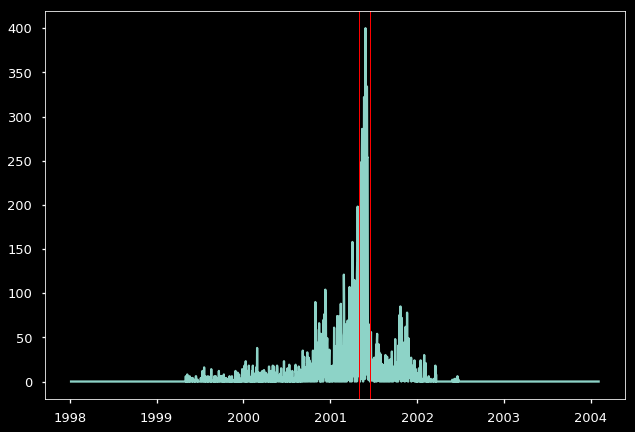

In [54]:
plt.plot(dates, summary_may_std)
plt.axvline(x= '2001-05-01 00:00:00', color='r', linewidth=1)
plt.axvline(x= '2001-06-15 00:00:00', color='r', linewidth=1)

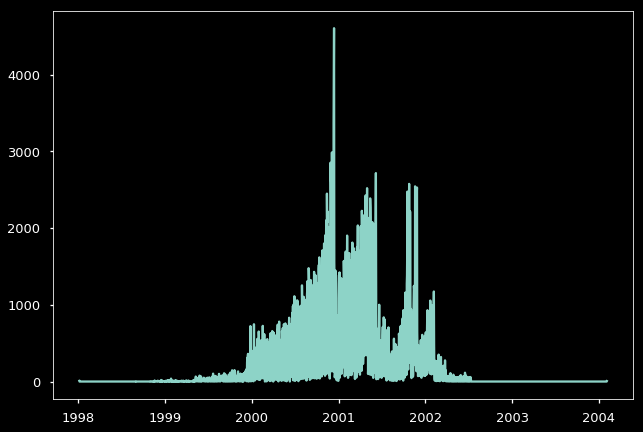

In [70]:
plt.plot(dates, summary_all)

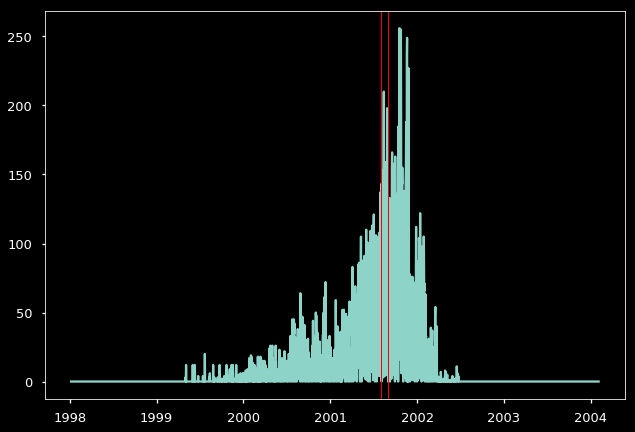

In [74]:
plt.plot(dates, summary_aug_std)
plt.axvline(x= '2001-08-01 00:00:00', color='r', linewidth=1)
plt.axvline(x= '2001-08-31 00:00:00', color='r', linewidth=1)

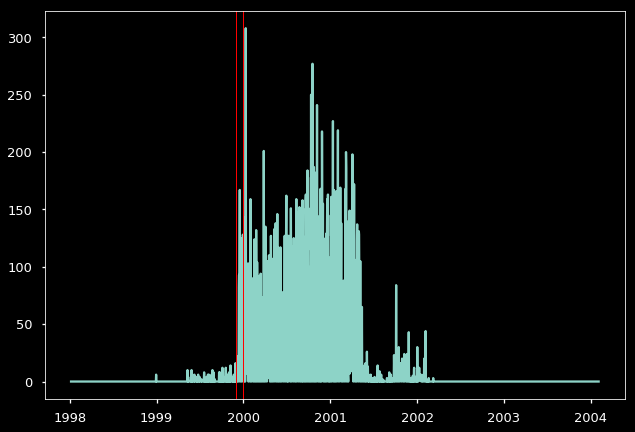

In [75]:
plt.plot(dates, summary_dec_std)
plt.axvline(x= '1999-12-01 00:00:00', color='r', linewidth=1)
plt.axvline(x= '1999-12-31 00:00:00', color='r', linewidth=1)

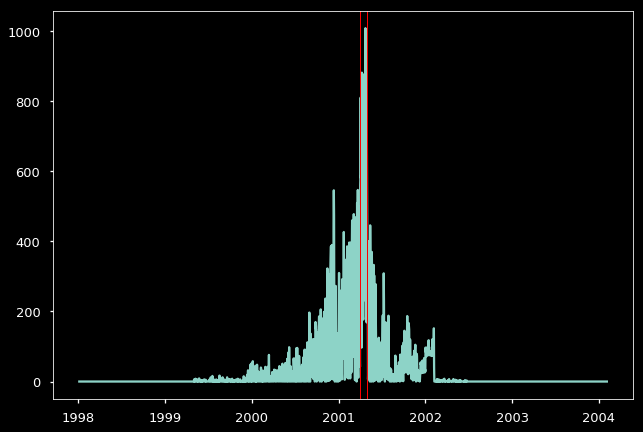

In [76]:
plt.plot(dates, summary_apr_std)
plt.axvline(x= '2001-04-01 00:00:00', color='r', linewidth=1)
plt.axvline(x= '2001-04-30 00:00:00', color='r', linewidth=1)